In [1]:
import torch
from models import DQN, DQN_CNN
from utils import Environment, ReplayBuffer, plot_results
from agent import Agent

# DQN

In [2]:
bananaWorld = Environment('unity_vector', 'Banana.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
config = {'lr': 0.001, 'alpha': 0.01, 'update_freq': 4, 'gamma': 0.99,
          'tau': 0.001, 'max_nr_steps': 10000, 'algo': 'dqn',
         'nr_episodes': 800, 'eps_min': 0.01, 'eps_decl': 0.995, 
         'output_freq': 100}

In [4]:
local_network = DQN(bananaWorld.observation_space_size, bananaWorld.action_space_size,
                    seed=0, hidden_layers=[16,16,16])
target_network = DQN(bananaWorld.observation_space_size, bananaWorld.action_space_size,
                     seed=0, hidden_layers=[16,16,16])
memory = ReplayBuffer(buffer_size=10000, batch_size=32, seed=0)
monkey = Agent(local_network, target_network, bananaWorld, memory, config, train_mode=True)

In [5]:
results = monkey.train()

finished episodes 1 - 100 with avg reward 0.89
finished episodes 101 - 200 with avg reward 3.23
finished episodes 201 - 300 with avg reward 6.55
finished episodes 301 - 400 with avg reward 9.83
finished episodes 401 - 500 with avg reward 11.99
finished episodes 501 - 600 with avg reward 12.35
finished episodes 601 - 700 with avg reward 13.76
finished episodes 701 - 800 with avg reward 13.79


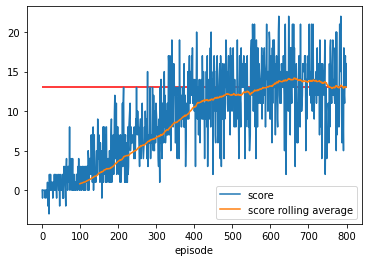

In [6]:
plot_results(results, window_size=100, target_score=13)

### to watch trained agent in action:

In [10]:
local_network = DQN(bananaWorld.observation_space_size, bananaWorld.action_space_size,
                    seed=0, hidden_layers=[16,16,16])
local_network.load_state_dict(torch.load('model.pth'))
trained_monkey = Agent(local_network, local_network, bananaWorld, None, config, train_mode=False)

In [11]:
trained_monkey.run()

Monkey got 19.0 points!


In [12]:
bananaWorld.close()